#### 연습 문제 1
- 붓꽃 분류 문제에서 꽃받침의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
- K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
- max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold , cross_val_score
from sklearn.tree import DecisionTreeClassifier

/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [20]:
iris = load_iris()
X,y = iris.data[:,[0,1]],iris.target

In [25]:
def changemaxdept(i,X,y):
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0).fit(X,y)
    return tree

In [26]:
changemaxdept(1,X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [29]:
score_ls = []
kfold = KFold(5)
for i in range(1,11):
    tree = changemaxdept(i,X,y)
    score_ls.append(cross_val_score(tree,X,y,cv=kfold))

In [30]:
mean_ls = []
for li in score_ls:
    mean_ls.append(np.mean(li))
mean_ls

[0.35333333333333333,
 0.4133333333333334,
 0.5733333333333335,
 0.56,
 0.62,
 0.5933333333333334,
 0.5866666666666667,
 0.56,
 0.5199999999999999,
 0.5533333333333333]

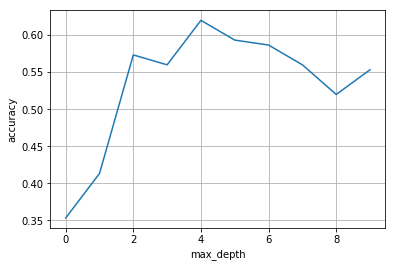

In [34]:
import matplotlib.pylab as plt
plt.ylabel("accuracy")
plt.xlabel("max_depth")
plt.grid(True)
plt.plot(mean_ls)
plt.show()

In [36]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
feature_names = ["pclass", "age", "sex"]
dfX = df[feature_names].copy()
dfy = df["survived"].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [38]:
from sklearn.preprocessing import LabelEncoder
dfX['sex'] = LabelEncoder().fit_transform(dfX['sex'])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [40]:
dfX['age'].fillna(dfX['age'].mean(),inplace=True)
dfX.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [41]:
from sklearn.preprocessing import LabelBinarizer
dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX['pclass']),\
                   columns=['c1','c2','c3'],index=dfX.index)
dfX = pd.concat([dfX,dfX2],axis=1)
del(dfX['pclass'])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=0)

In [43]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)

In [45]:
from sklearn.metrics import *

In [46]:
confusion_matrix(y_train, model.predict(X_train))

array([[384,  55],
       [ 78, 195]])

In [47]:
confusion_matrix(y_test, model.predict(X_test))

array([[95, 15],
       [20, 49]])

In [48]:
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       439
          1       0.78      0.71      0.75       273

avg / total       0.81      0.81      0.81       712



In [51]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       110
          1       0.77      0.71      0.74        69

avg / total       0.80      0.80      0.80       179



#### 연습 문제 2
- breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
- 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

#### 연습 문제 3
- MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
- 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.

In [70]:
from sklearn.datasets import load_breast_cancer,load_digits
cancer = load_breast_cancer()
X,y = cancer.data,cancer.target

In [71]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0).fit(X,y)

In [72]:
kfold = KFold(5)
(cross_val_score(tree,X,y,cv=kfold)).mean()

0.9402111473373699

In [73]:
digits = load_digits()
X,y = digits.data,digits.target

In [74]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0).fit(X,y)

In [75]:
kfold = KFold(5)
(cross_val_score(tree,X,y,cv=kfold)).mean()

0.7351593933766636

### Aggregation
- `VotingClassifier`
- `BaggingClassifier`
- `RandomForestClassifier`
- `ExtraTreesClassifier`

In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,\
VotingClassifier,ExtraTreesClassifier,BaggingClassifier

In [82]:
X,y = iris.data,iris.target

In [80]:
clf1 = LogisticRegression(random_state=1)
clf2 = LinearDiscriminantAnalysis()
clf3 = GaussianNB()

In [81]:
eclf1 = VotingClassifier([('lr',clf1),('lda',clf2),('gn',clf3)],voting='hard')

In [83]:
eclf1.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('gn', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [87]:
confusion_matrix(y,eclf1.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [88]:
eclf2 = VotingClassifier([('lr',clf1),('lda',clf2),('gn',clf3)],voting='soft',weights=[1,2,1])

In [89]:
eclf2.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('lda', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('gn', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 2, 1])

In [90]:
confusion_matrix(y,eclf2.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]])

In [98]:
#bagging
#배깅(bagging)은 동일한 모형과 모형 모수를 사용하는 대신 부트스트래핑(bootstrapping)과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용한다.
model = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,bootstrap_features=True,max_samples=0.5,max_features=1)

In [99]:
model.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=True, max_features=1,
         max_samples=0.5, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [100]:
confusion_matrix(y,model.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  3, 47]])

In [101]:
#Random Forest
#랜덤 포레스트(Random Forest)는 의사 결정 나무(Decision Tree)를 개별 모형으로 사용하는 모형 결합 방법을 말한다.
#Extremely Random Forest
#이러한 방법을 극단적으로 적용한 것이 Extremely Randomized Trees 모형으로 이 경우에는 각 노드에서 랜덤하게 독립 변수를 선택한다.
model1 = RandomForestClassifier(max_depth=4, n_estimators=30)
model2 = ExtraTreesClassifier(max_depth=4,n_estimators=30)

In [102]:
model1.fit(X,y)
model2.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [103]:
confusion_matrix(y,model1.predict(X))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]])

In [104]:
confusion_matrix(y,model2.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  3, 47]])

랜덤 포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.

In [105]:
model3 = ExtraTreesClassifier(n_estimators=250,random_state=0)
model3.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [106]:
model3.feature_importances_

array([0.09005113, 0.06458695, 0.40852606, 0.43683587])

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()                             
clf2 = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0).fit(X,y)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.9599673202614379